In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [2]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [3]:
access = pd.read_csv ("amazon employee access dataset.csv")

In [4]:
access


,ACTION,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
0,1,39353,85475,117961,118300,123472,117905,117906,290919,117908
1,1,17183,1540,117961,118343,123125,118536,118536,308574,118539
2,1,36724,14457,118219,118220,117884,117879,267952,19721,117880
3,1,36135,5396,117961,118343,119993,118321,240983,290919,118322
4,1,42680,5905,117929,117930,119569,119323,123932,19793,119325
...,...,...,...,...,...,...,...,...,...,...
32764,1,23497,16971,117961,118300,119993,118321,240983,290919,118322
32765,1,25139,311198,91261,118026,122392,121143,173805,249618,121145
32766,1,34924,28805,117961,118327,120299,124922,152038,118612,124924
32767,1,80574,55643,118256,118257,117945,280788,280788,292795,119082


In [5]:
access.shape

(32769, 10)

In [6]:
access.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32769 entries, 0 to 32768
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   ACTION            32769 non-null  int64
 1   RESOURCE          32769 non-null  int64
 2   MGR_ID            32769 non-null  int64
 3   ROLE_ROLLUP_1     32769 non-null  int64
 4   ROLE_ROLLUP_2     32769 non-null  int64
 5   ROLE_DEPTNAME     32769 non-null  int64
 6   ROLE_TITLE        32769 non-null  int64
 7   ROLE_FAMILY_DESC  32769 non-null  int64
 8   ROLE_FAMILY       32769 non-null  int64
 9   ROLE_CODE         32769 non-null  int64
dtypes: int64(10)
memory usage: 2.5 MB


In [7]:
access.describe()

,ACTION,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
count,32769.000000,32769.000000,32769.000000,32769.000000,32769.000000,32769.000000,32769.000000,32769.000000,32769.000000,32769.000000
mean,0.942110,42923.916171,25988.957979,116952.627788,118301.823156,118912.779914,125916.152644,170178.369648,183703.408893,119789.430132
std,0.233539,34173.892702,35928.031650,10875.563591,4551.588572,18961.322917,31036.465825,69509.462130,100488.407413,5784.275516
min,0.000000,0.000000,25.000000,4292.000000,23779.000000,4674.000000,117879.000000,4673.000000,3130.000000,117880.000000
25%,1.000000,20299.000000,4566.000000,117961.000000,118102.000000,118395.000000,118274.000000,117906.000000,118363.000000,118232.000000
50%,1.000000,35376.000000,13545.000000,117961.000000,118300.000000,118921.000000,118568.000000,128696.000000,119006.000000,118570.000000
75%,1.000000,74189.000000,42034.000000,117961.000000,118386.000000,120535.000000,120006.000000,235280.000000,290919.000000,119348.000000
max,1.000000,312153.000000,311696.000000,311178.000000,286791.000000,286792.000000,311867.000000,311867.000000,308574.000000,270691.000000


<Axes: >

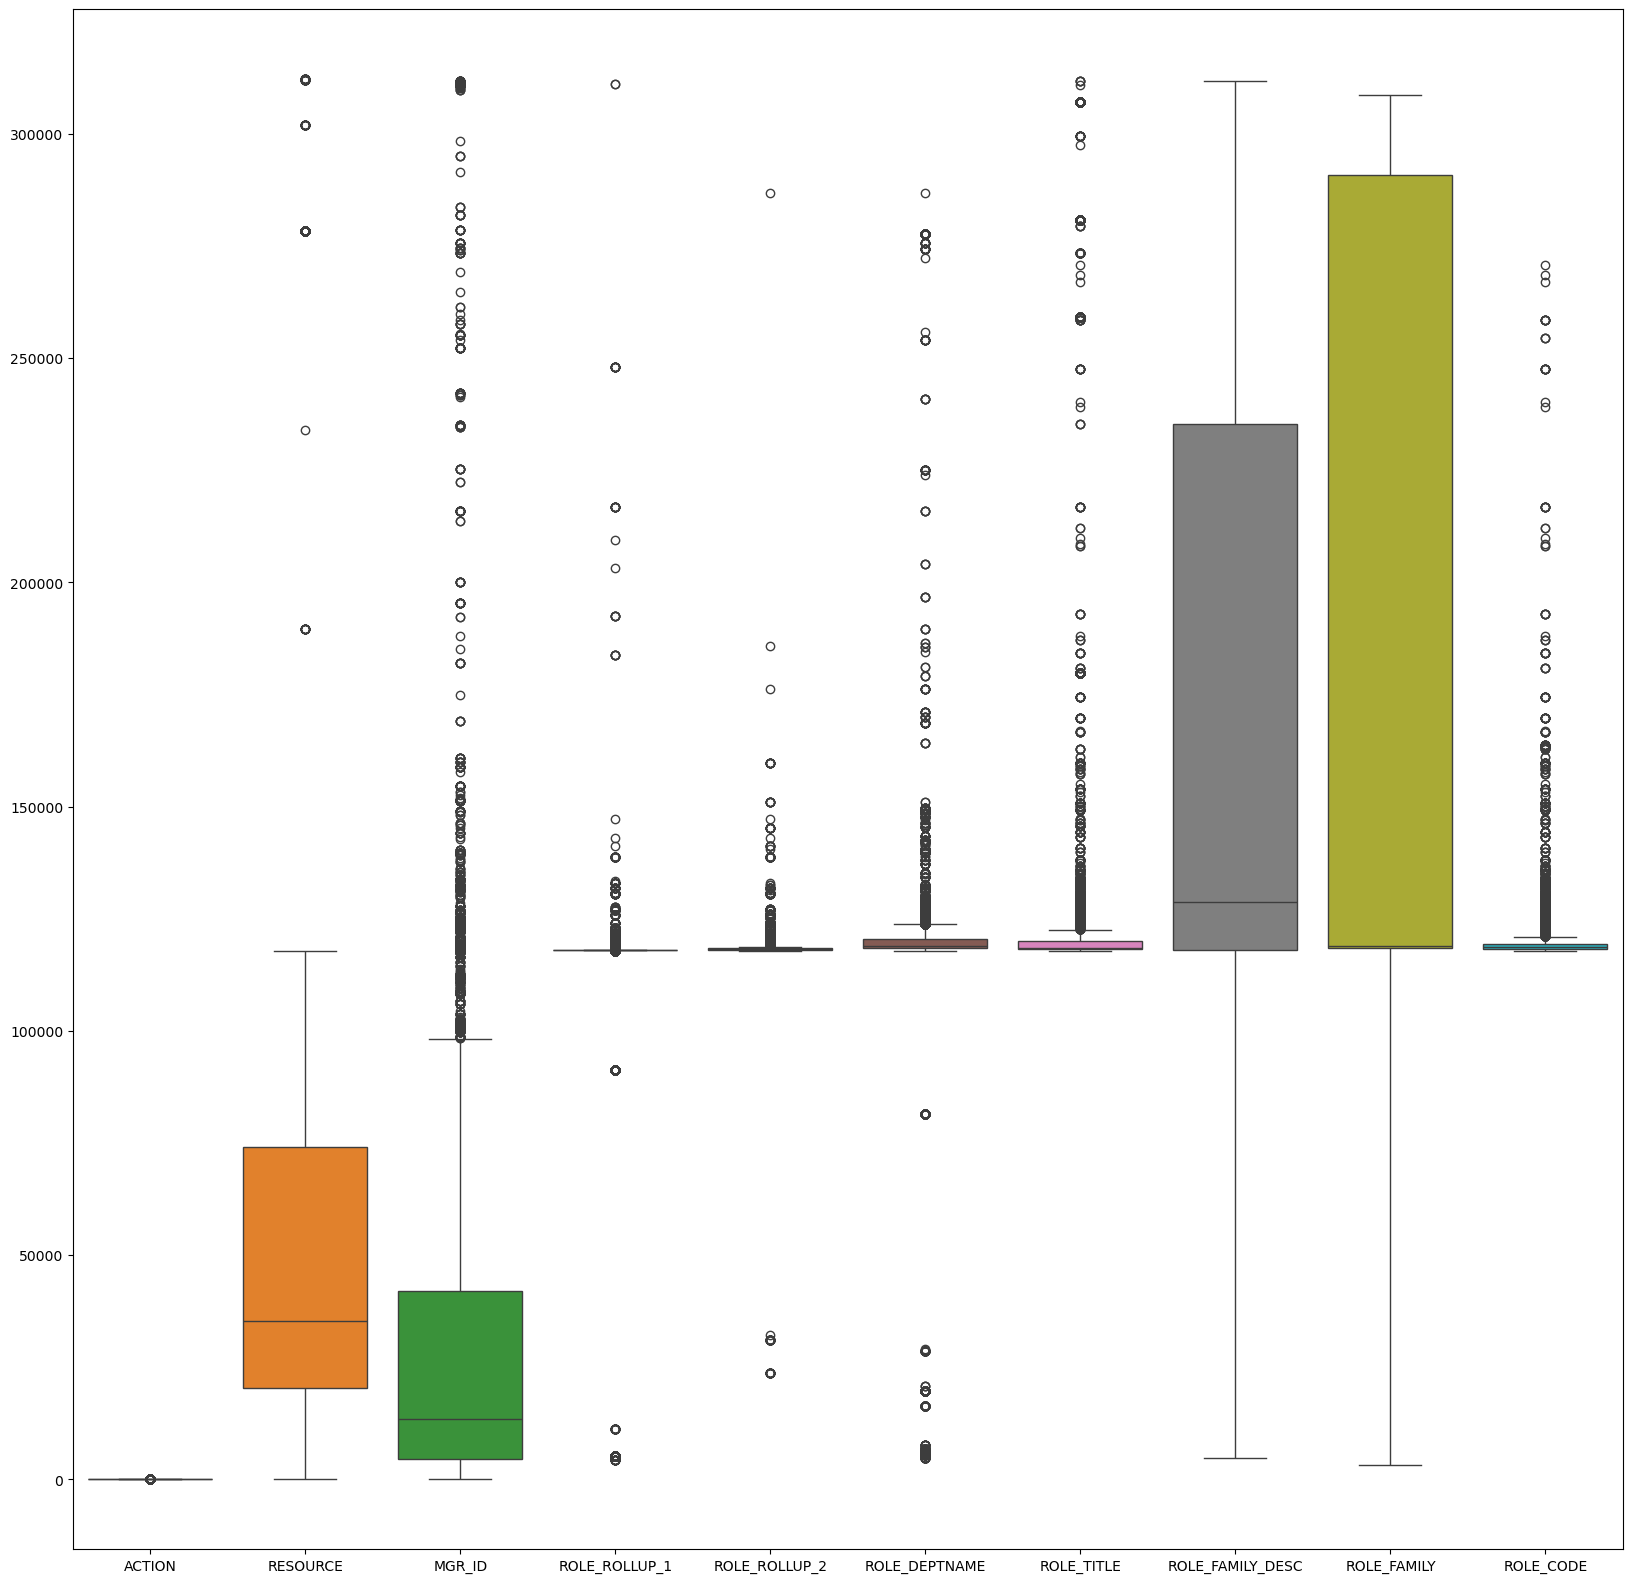

In [8]:
fig,ax=plt.subplots(figsize = (20,20))
sns.boxplot(data = access,ax =ax)

<Axes: xlabel='RESOURCE'>

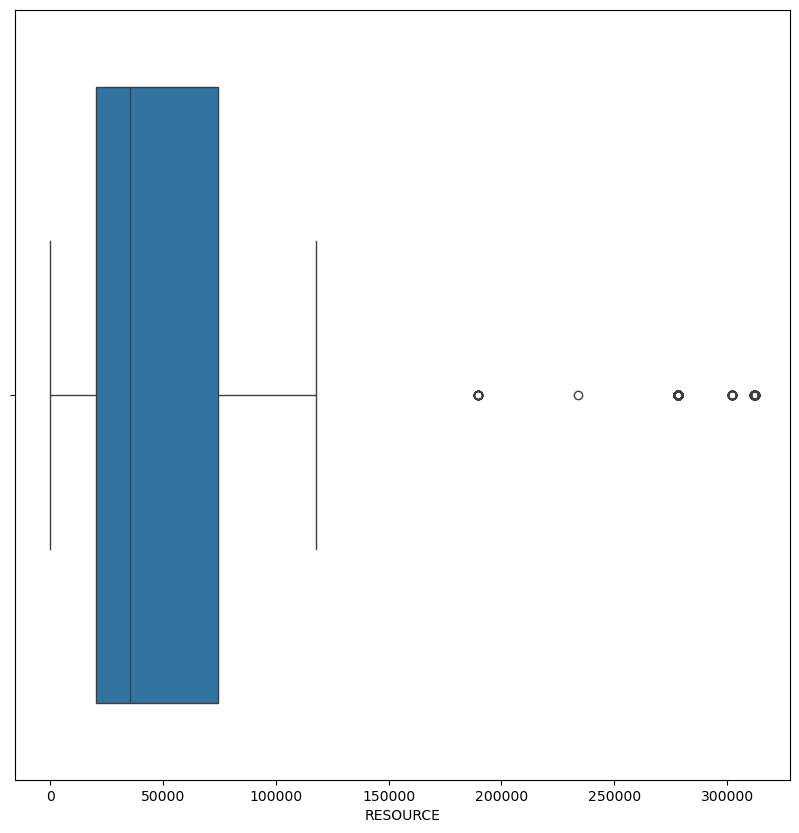

In [9]:
fig, ax = plt.subplots(figsize =(10,10))
sns.boxplot(x=access['RESOURCE'],ax=ax)                       

In [10]:
Q1 = access['RESOURCE'].quantile(0.25)
Q3 = access['RESOURCE'].quantile(0.75)

# Calculate IQR
IQR = Q3-Q1

#Determine the outlier boundaries

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

#Filterout the outliers
newdata = access[(access['RESOURCE'] >=lower_bound) & (access ['RESOURCE'] <= upper_bound)]

<Axes: xlabel='RESOURCE'>

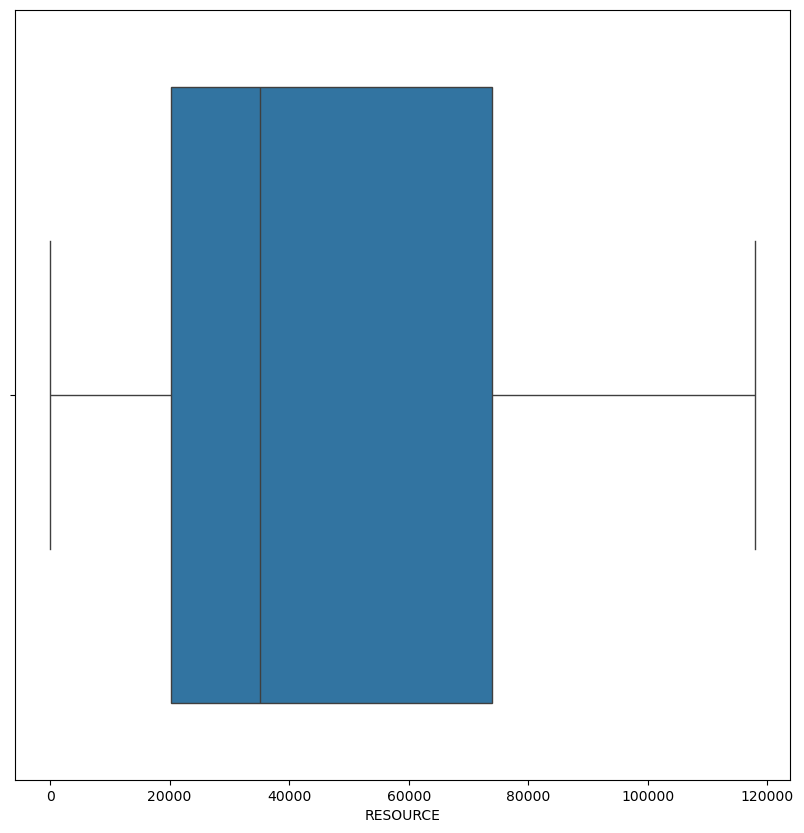

In [11]:
fig, ax = plt.subplots(figsize =(10,10))
sns.boxplot(x=newdata['RESOURCE'],ax=ax) 

In [12]:
Q1 = newdata['MGR_ID'].quantile(0.25)
Q3 = newdata['MGR_ID'].quantile(0.75)

# Calculate IQR
IQR = Q3-Q1

#Determine the outlier boundaries

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

#Filterout the outliers
newdata1 = newdata[(newdata['MGR_ID'] >=lower_bound) & (newdata ['MGR_ID'] <= upper_bound)]

<Axes: xlabel='MGR_ID'>

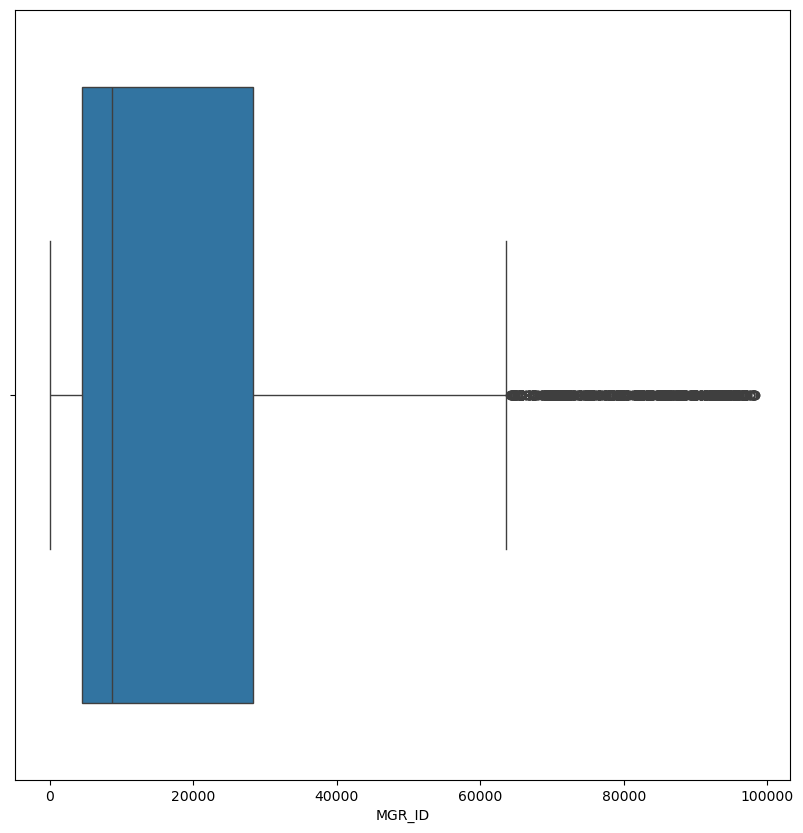

In [13]:
fig, ax = plt.subplots(figsize =(10,10))
sns.boxplot(x=newdata1['MGR_ID'],ax=ax) 

<Axes: xlabel='ROLE_TITLE'>

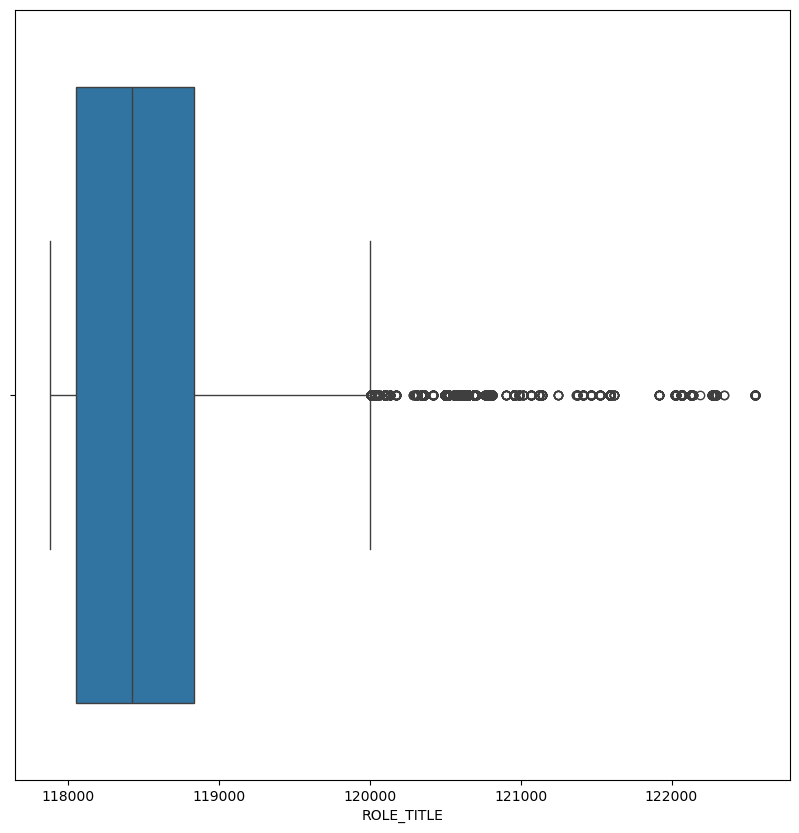

In [14]:
Q1 = newdata1['ROLE_TITLE'].quantile(0.25)
Q3 = newdata1['ROLE_TITLE'].quantile(0.75)

# Calculate IQR
IQR = Q3-Q1

#Determine the outlier boundaries

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

#Filterout the outliers
newdata2 = newdata1[(newdata1['ROLE_TITLE'] >=lower_bound) & (newdata1 ['ROLE_TITLE'] <= upper_bound)]

fig, ax = plt.subplots(figsize =(10,10))
sns.boxplot(x=newdata2['ROLE_TITLE'],ax=ax) 

<Axes: xlabel='ROLE_DEPTNAME'>

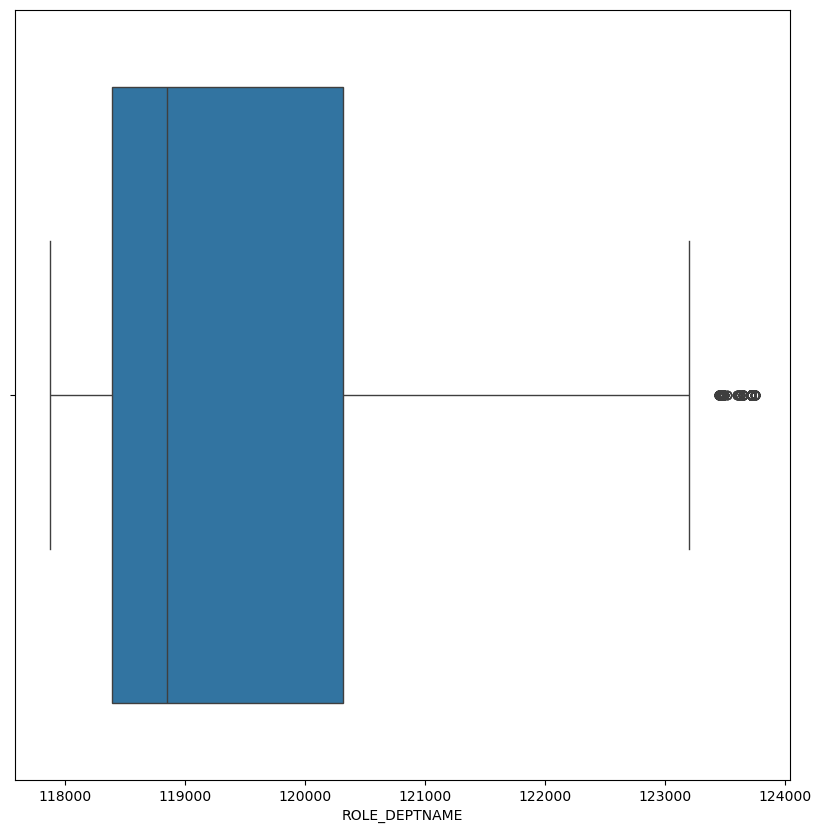

In [15]:
Q1 = newdata2['ROLE_DEPTNAME'].quantile(0.25)
Q3 = newdata2['ROLE_DEPTNAME'].quantile(0.75)

# Calculate IQR
IQR = Q3-Q1

#Determine the outlier boundaries

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

#Filterout the outliers
newdata3 = newdata2[(newdata2['ROLE_DEPTNAME'] >=lower_bound) & (newdata2 ['ROLE_DEPTNAME'] <= upper_bound)]

fig, ax = plt.subplots(figsize =(10,10))
sns.boxplot(x=newdata3['ROLE_DEPTNAME'],ax=ax) 

<Axes: xlabel='ROLE_FAMILY_DESC'>

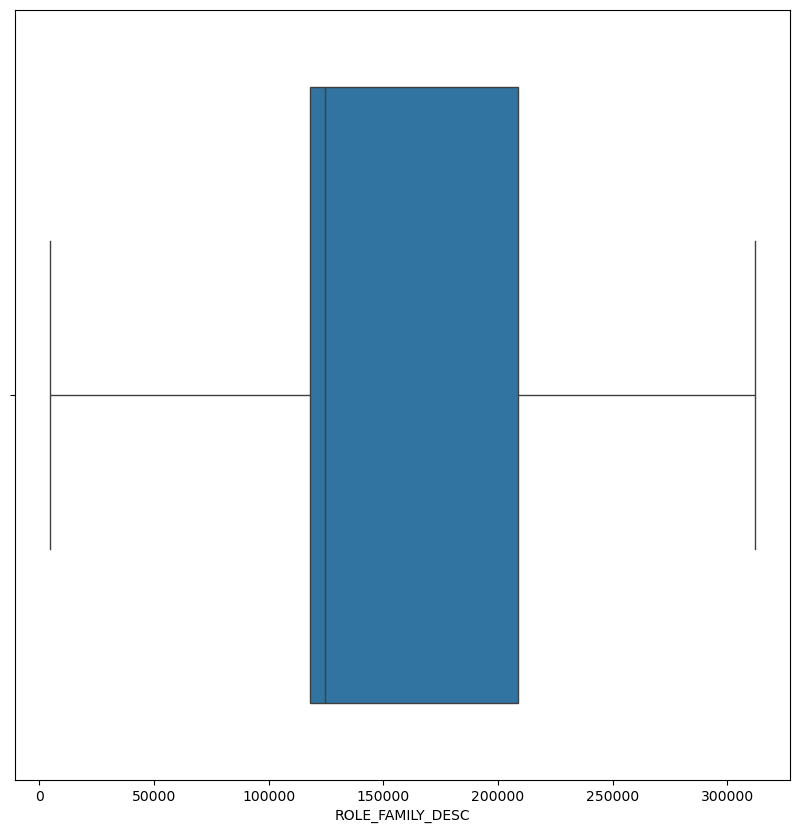

In [16]:
Q1 = newdata3['ROLE_FAMILY_DESC'].quantile(0.25)
Q3 = newdata3['ROLE_FAMILY_DESC'].quantile(0.75)

# Calculate IQR
IQR = Q3-Q1

#Determine the outlier boundaries

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

#Filterout the outliers
newdata4 = newdata3[(newdata3['ROLE_FAMILY_DESC'] >=lower_bound) & (newdata3 ['ROLE_FAMILY_DESC'] <= upper_bound)]

fig, ax = plt.subplots(figsize =(10,10))
sns.boxplot(x=newdata4['ROLE_FAMILY_DESC'],ax=ax) 

<Axes: xlabel='ROLE_FAMILY'>

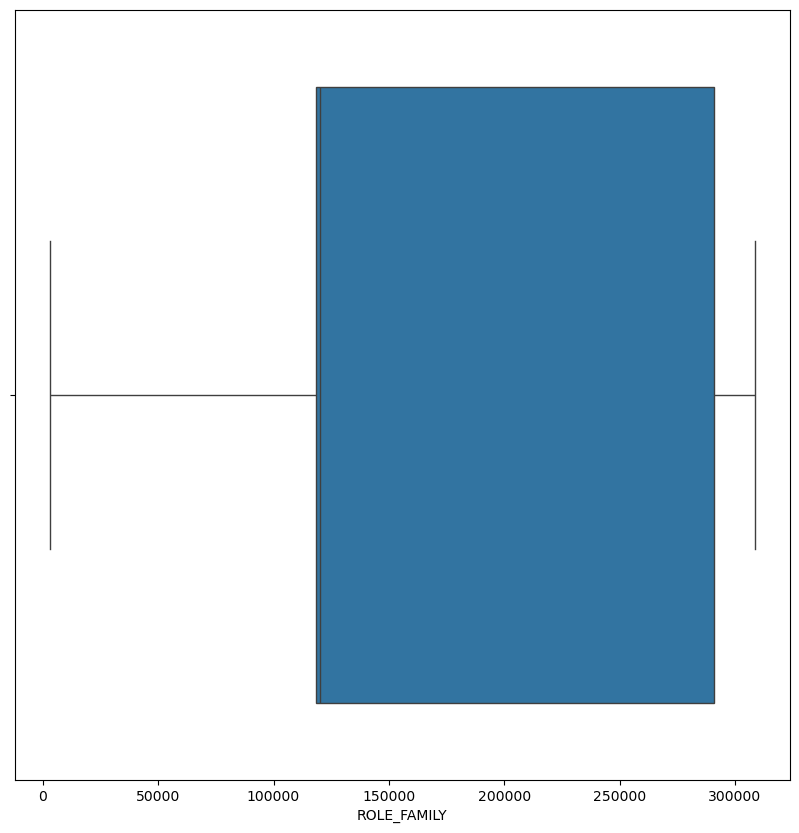

In [17]:
Q1 = newdata4['ROLE_FAMILY'].quantile(0.25)
Q3 = newdata4['ROLE_FAMILY'].quantile(0.75)

# Calculate IQR
IQR = Q3-Q1

#Determine the outlier boundaries

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

#Filterout the outliers
newdata5 = newdata4[(newdata3['ROLE_FAMILY'] >=lower_bound) & (newdata4 ['ROLE_FAMILY'] <= upper_bound)]

fig, ax = plt.subplots(figsize =(10,10))
sns.boxplot(x=newdata5['ROLE_FAMILY'],ax=ax) 

<Axes: xlabel='ROLE_CODE'>

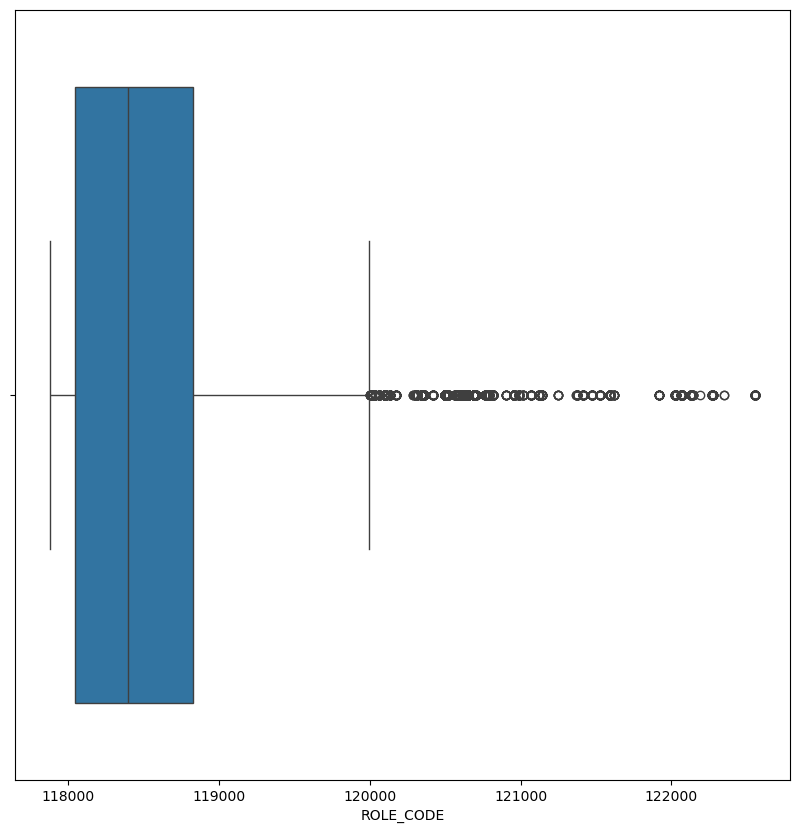

In [18]:
Q1 = newdata5['ROLE_CODE'].quantile(0.25)
Q3 = newdata5['ROLE_CODE'].quantile(0.75)

# Calculate IQR
IQR = Q3-Q1

#Determine the outlier boundaries

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

#Filterout the outliers
newdata6 = newdata5[(newdata3['ROLE_CODE'] >=lower_bound) & (newdata5 ['ROLE_CODE'] <= upper_bound)]

fig, ax = plt.subplots(figsize =(10,10))
sns.boxplot(x=newdata5['ROLE_CODE'],ax=ax) 

In [19]:
correlation = newdata6.corr()

In [20]:
correlation

,ACTION,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
ACTION,1.000000,0.009841,-0.035440,-0.012816,0.016044,0.031070,0.003248,0.008298,0.012072,0.000486
RESOURCE,0.009841,1.000000,0.021028,-0.009963,0.019062,0.006365,0.013928,0.014406,0.073011,0.011695
MGR_ID,-0.035440,0.021028,1.000000,-0.041883,-0.019245,-0.221921,-0.084162,-0.037646,-0.231196,-0.085222
ROLE_ROLLUP_1,-0.012816,-0.009963,-0.041883,1.000000,0.028909,0.038427,-0.011008,-0.016090,0.042391,-0.012775
ROLE_ROLLUP_2,0.016044,0.019062,-0.019245,0.028909,1.000000,0.048430,0.013110,0.008427,0.085729,0.013503
ROLE_DEPTNAME,0.031070,0.006365,-0.221921,0.038427,0.048430,1.000000,0.123720,0.043454,0.319182,0.121886
ROLE_TITLE,0.003248,0.013928,-0.084162,-0.011008,0.013110,0.123720,1.000000,0.279785,-0.151752,0.961345
ROLE_FAMILY_DESC,0.008298,0.014406,-0.037646,-0.016090,0.008427,0.043454,0.279785,1.000000,-0.118917,0.285491
ROLE_FAMILY,0.012072,0.073011,-0.231196,0.042391,0.085729,0.319182,-0.151752,-0.118917,1.000000,-0.151340
ROLE_CODE,0.000486,0.011695,-0.085222,-0.012775,0.013503,0.121886,0.961345,0.285491,-0.151340,1.000000


<Axes: >

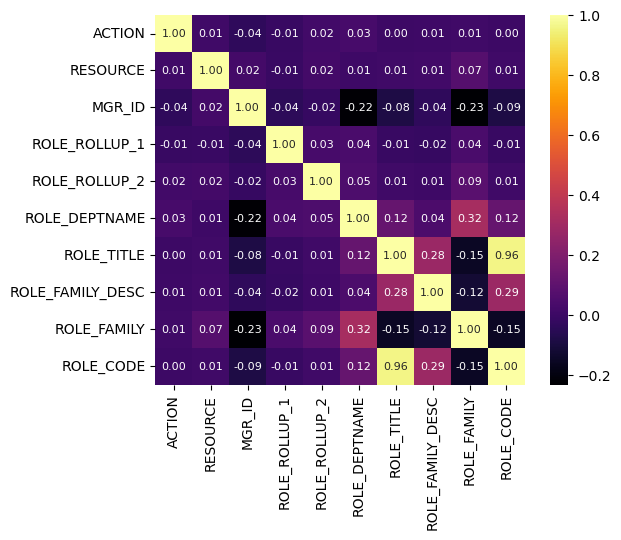

In [21]:
sns.heatmap(correlation, cbar = True, square = True, annot = True, annot_kws= {'size':8}, fmt = '.2f', cmap = 'inferno')

In [22]:
#SMOTE - Synthetic minority oversampling techniques

from imblearn.over_sampling import SMOTE

In [23]:
smote = SMOTE ()

In [24]:
x = newdata6.drop('ACTION',axis=1)
x

,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
0,39353,85475,117961,118300,123472,117905,117906,290919,117908
1,17183,1540,117961,118343,123125,118536,118536,308574,118539
2,36724,14457,118219,118220,117884,117879,267952,19721,117880
3,36135,5396,117961,118343,119993,118321,240983,290919,118322
4,42680,5905,117929,117930,119569,119323,123932,19793,119325
...,...,...,...,...,...,...,...,...,...
32760,17308,1550,117961,118225,123173,119093,123174,119095,119096
32762,6921,3954,117961,118343,120291,118422,300136,118424,118425
32763,32147,3883,117961,118343,119987,118784,118785,290919,118786
32764,23497,16971,117961,118300,119993,118321,240983,290919,118322


In [25]:
y = newdata6['ACTION']
y

0        1
1        1
2        1
3        1
4        1
        ..
32760    1
32762    1
32763    1
32764    1
32768    1
Name: ACTION, Length: 21469, dtype: int64

In [26]:
x_resampled, y_resampled = smote.fit_resample(x,y)

In [27]:
x_train,x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size = 0.3, random_state = 42)

In [28]:
x_resampled.shape, x_train.shape, x_test.shape, y_resampled.shape,y_train.shape,y_test.shape


((40268, 9), (28187, 9), (12081, 9), (40268,), (28187,), (12081,))

In [29]:
model = RandomForestClassifier()

In [30]:
model.fit(x_train, y_train)

RandomForestClassifier()

In [62]:
train_data_predict = model.predict(x_train)
train_data_accuracy = accuracy_score(train_data_predict, y_train)
print('Accurcay of training data', train_data_accuracy)

Accurcay of training data 0.9999645226522865


In [64]:
testing_data_predict = model.predict(x_test)
testing_data_accuracy = accuracy_score(testing_data_predict,y_test)
print('accuracy of testing data:', testing_data_accuracy)

accuracy of testing data: 0.9659796374472311


In [66]:
cm = confusion_matrix(testing_data_predict,y_test)
cm

array([[5788,  180],
       [ 231, 5882]], dtype=int64)

<function matplotlib.pyplot.show(close=None, block=None)>

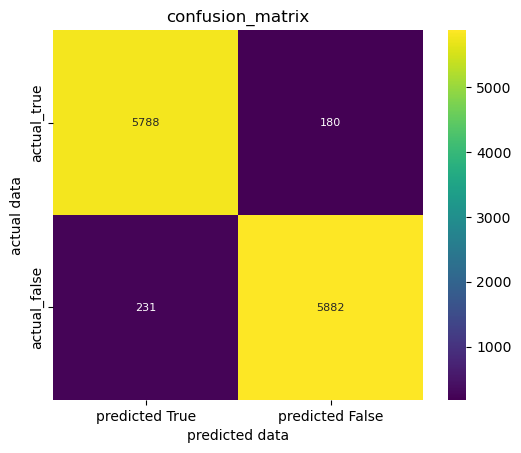

In [68]:
sns.heatmap(cm,annot = True, annot_kws = {'size': 8}, fmt = 'd',cmap = 'viridis', square = True,
            xticklabels = ['predicted True','predicted False'],
            yticklabels = ['actual_true','actual_false'])
plt.xlabel('predicted data')
plt.ylabel('actual data')
plt.title('confusion_matrix')
plt.show

In [70]:
print(classification_report(testing_data_predict, y_test))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97      5968
           1       0.97      0.96      0.97      6113

    accuracy                           0.97     12081
   macro avg       0.97      0.97      0.97     12081
weighted avg       0.97      0.97      0.97     12081



In [76]:
newdata6.head()

,ACTION,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
0,1,39353,85475,117961,118300,123472,117905,117906,290919,117908
1,1,17183,1540,117961,118343,123125,118536,118536,308574,118539
2,1,36724,14457,118219,118220,117884,117879,267952,19721,117880
3,1,36135,5396,117961,118343,119993,118321,240983,290919,118322
4,1,42680,5905,117929,117930,119569,119323,123932,19793,119325


In [82]:
input_data= (45333,	14561,	117951,	117952,	118008,	118568,	118568,	19721,	118570)
input_data_as_np = np.asarray(input_data)
input_data_reshaped = input_data_as_np.reshape(1,-1)
prediction = model.predict(input_data_reshaped)
if prediction[0]==0:
    print('0')
else:
    print('1')


0


C:\Users\Safak\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
